The key to success in any organization is attracting and retaining top talent. I’m an HR analyst at my company, and one of my tasks is to determine which factors keep employees at my company and which prompt others to leave. I need to know what factors I can change to prevent the loss of good people. Watson Analytics is going to help.

Content
I have data about past and current employees in a spreadsheet on my desk top. It has various data points on our employees, but I’m most interested in whether they’re still with my company or whether they’ve gone to work somewhere else. And I want to understand how this relates to workforce attrition.

Education
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

# import all the import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

d = pd.read_csv('employee.csv')
d.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Exploration

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
d.shape

(1470, 35)

In [6]:
d.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Categorical columns
d.select_dtypes(include='object').columns # note object type can't use directly into machine learning we need to convert it so here we are basically looking our orbject data name and how many they we will do there conversion later on

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
len(d.select_dtypes(include='object').columns)

9

# Remove all the unnecessary data and convert the dataset into machine learning training purpose

In [9]:
dataset = d.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

In [11]:
dataset.shape

(1470, 31)

In [12]:
dataset.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [16]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Visualising Our Dataset

C:\Users\91956\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

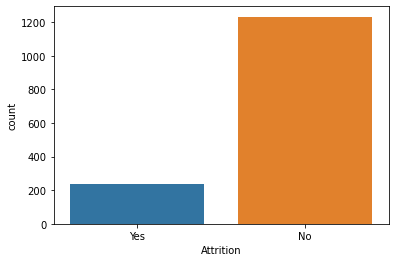

In [18]:
sns.countplot(dataset['Attrition'])

In [22]:
Stay = (dataset.Attrition=='Yes').sum()
Leave = (dataset.Attrition=='No').sum()
Leaving_pt = Stay*100/(Stay+Leave)
print(' ',Stay,'Employee want to leave',' ',Leave, 'want to stay')
print(' ',Leaving_pt,'% Percentage of employee want to leave')

  237 Employee want to leave   1233 want to stay
  16.122448979591837 % Percentage of employee want to leave


<AxesSubplot:xlabel='Age', ylabel='count'>

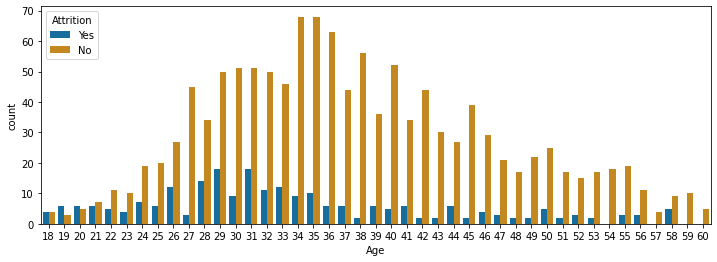

In [24]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=dataset, palette = 'colorblind')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

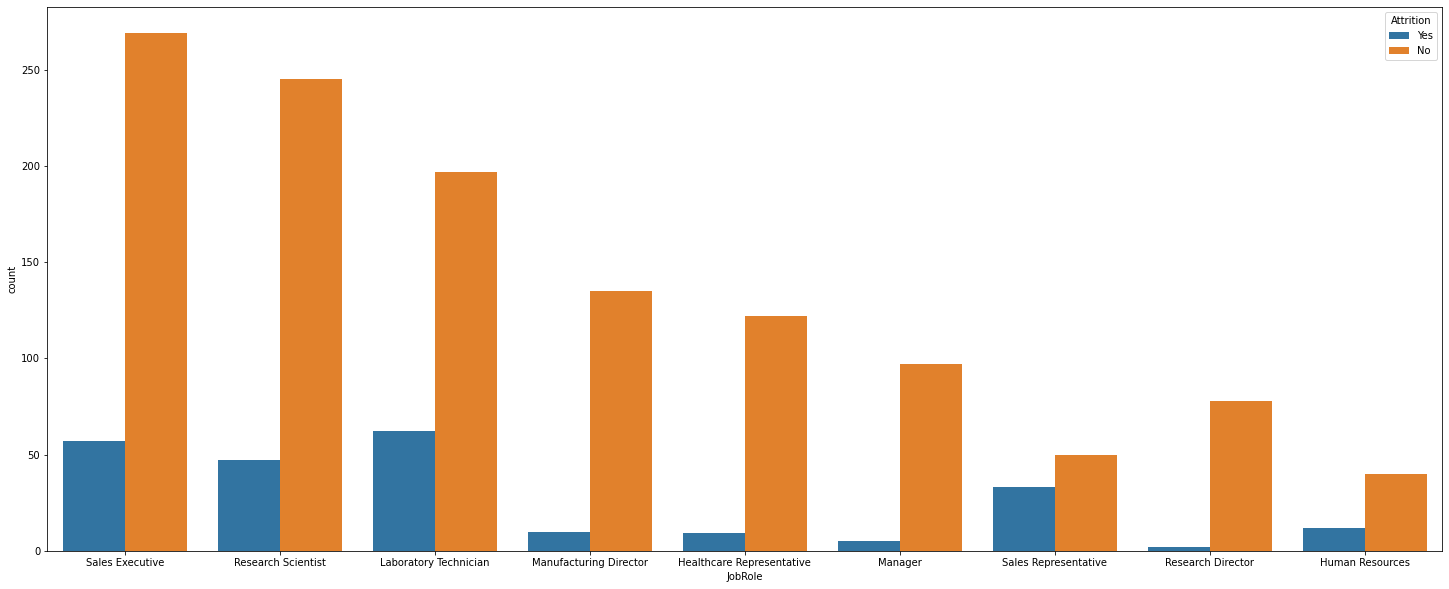

In [35]:
plt.figure(figsize=(25,10))
sns.countplot(x ='JobRole',hue ='Attrition',data = dataset)

<AxesSubplot:>

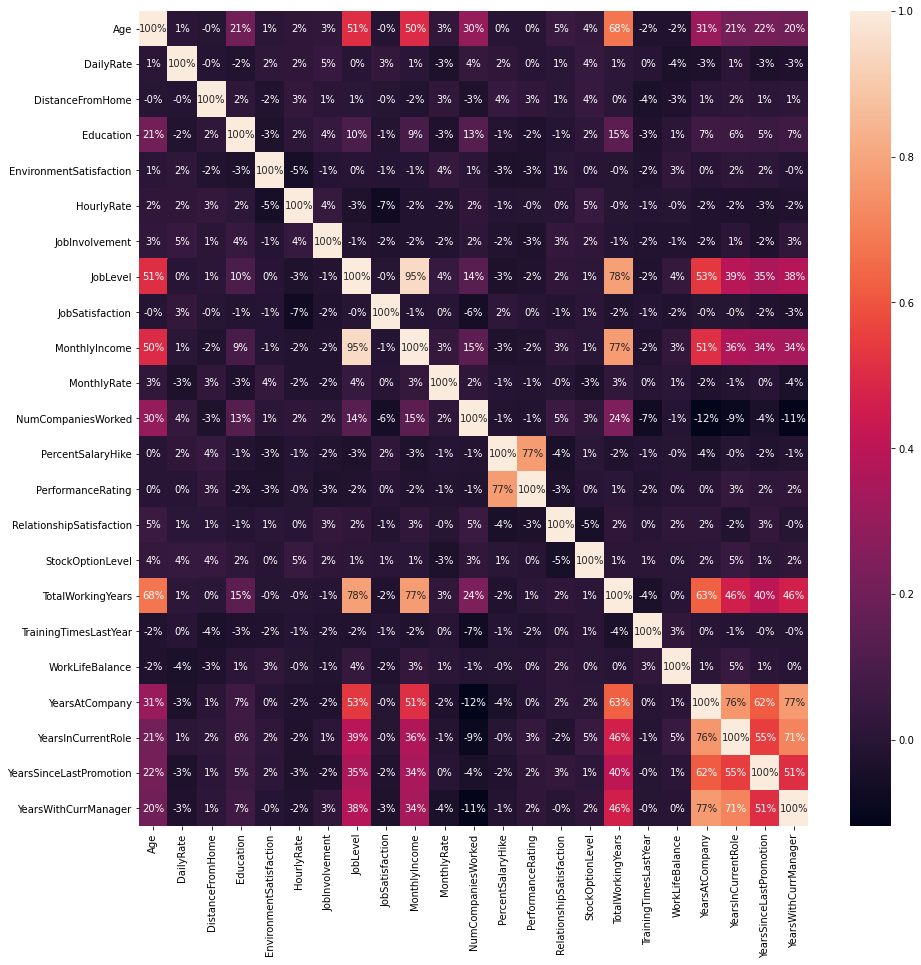

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot =True,fmt='.0%')

# Handling Object Data

In [36]:
dataset.select_dtypes(include ='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [37]:
len(dataset.select_dtypes(include ='object').columns)

8

In [38]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [39]:
len(dataset.select_dtypes(include ='object').columns)

0

In [42]:
pd.set_option('display.max_rows', None)
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [44]:
dataset.rename(columns={'Attrition_Yes':'Attrition'}, inplace=True)

# DataSet Splitting

In [46]:
x = dataset.drop(columns='Attrition')
y = dataset['Attrition']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
x_train.shape

(1176, 44)

In [54]:
y_test.shape

(294,)

# Applying Various Machine Leanring models

In [57]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=0)
lgr.fit(x_train,y_train)

C:\Users\91956\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [59]:
y_pred = lgr.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(acc*100)

86.39455782312925


In [61]:
confusion_matrix(y_test,y_pred)

array([[253,   2],
       [ 38,   1]], dtype=int64)

# Random Forest Classifier Model

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [65]:
y_rfc_pred =rfc.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_test,y_rfc_pred)*100

87.75510204081633

In [68]:
confusion_matrix(y_test,y_rfc_pred)

array([[254,   1],
       [ 35,   4]], dtype=int64)